In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

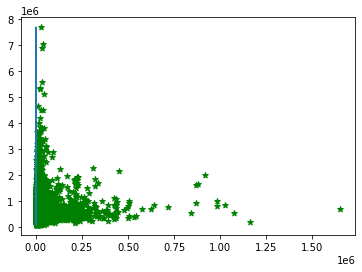

In [35]:
plt.scatter(df.sqft_lot,df.price,color='green', marker='*')
plt.plot(df.bedrooms,df.price)
plt.plot

In [6]:
df2=df.drop(['id','date'],axis=1)

In [7]:
X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values

In [8]:
#Create linear regression object
model=linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [10]:
model.predict([[3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650]])

array([208877.94625845])

In [14]:
#Predict price of home with sqft_living
a=model.coef_
b=model.intercept_
y_pred=a*X+b
y_pred

array([[ 6583024.97875848,  6731468.88162172,  6820647.18320271, ...,
        32942549.21584411,  6719377.67970758,  6688162.67663943],
       [ 6583024.97875848,  6782899.22978714,  6974162.76486161, ...,
        32955862.46519581,  6726966.16986905,  6687401.60200067],
       [ 6618791.52020212,  6731468.88162172,  6775365.60875655, ...,
        32937395.69996604,  6749298.01234422,  6687239.74449831],
       ...,
       [ 6618791.52020212,  6721182.81198864,  6802976.32488226, ...,
        32951567.86863074,  6712439.63155995,  6689556.64089734],
       [ 6583024.97875848,  6793185.29942022,  6867033.18629388, ...,
        32902180.0081325 ,  6720895.37773988,  6689832.14302902],
       [ 6618791.52020212,  6721182.81198864,  6802976.32488226, ...,
        32951567.86863074,  6712439.63155995,  6689805.35809955]])